In [ ]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
import re

import warnings
warnings.filterwarnings('ignore')

import piccard as pc
import piccard2 as pc2

from tscluster.opttscluster import OptTSCluster
# from tscluster.tskmeans import TSKmeans, TSGlobalKmeans
from tscluster.preprocessing.utils import load_data
# from tscluster.metrics import inertia, max_dist

In [14]:
households_data_2021 = gpd.read_file("data_testing/households_data_2021.geojson")
households_data_2016 = gpd.read_file("data_testing/households_data_2016.geojson")
households_data_2011 = gpd.read_file("data_testing/households_data_2011.geojson")

households_data_2021.rename(columns={'v_CA21_434: Occupied private dwellings by structural type of dwelling data': 'occupied_private_dwellings',
                                     'v_CA21_435: Single-detached house': 'single_detached_house',
                                     'v_CA21_440: Apartment in a building that has five or more storeys': 'apt_five_or_more'}, inplace=True)
households_data_2016.rename(columns={'v_CA16_408: Occupied private dwellings by structural type of dwelling data': 'occupied_private_dwellings',
                                     'v_CA16_409: Single-detached house': 'single_detached_house',
                                     'v_CA16_410: Apartment in a building that has five or more storeys': 'apt_five_or_more'}, inplace=True)

In [15]:
census_dfs = [households_data_2016, households_data_2021]
years = ['2016', '2021']

network_table = pc.create_network_table(census_dfs, years, 'name')
network_table

,name_2016,name_2021,csd_uid_2016,cma_uid_2016,dwellings 2016_2016,population_2016,dwellings_2016,population 2016_2016,households_2016,type_2016,...,households 2016_2021,quality flags_2021,shape area_2021,cd_uid_2021,region name_2021,area (sq km)_2021,occupied_private_dwellings_2021,single_detached_house_2021,apt_five_or_more_2021,network_level_2021
0,2016_0001.00,2021_0001.00,3520005,35535,274,599,253,595,235,CT,...,247,0,6.8192,3520,0001.00,6.8192,235.0,15.0,0.0,2
1,2016_0002.00,2021_0002.00,3520005,35535,279,604,294,620,284,CT,...,270,0,3.3926,3520,0002.00,3.3926,285.0,250.0,0.0,2
2,2016_0003.00,2021_0003.00,3520005,35535,267,457,279,749,265,CT,...,258,0,0.9455,3520,0003.00,0.9455,265.0,0.0,265.0,2
3,2016_0004.00,2021_0004.00,3520005,35535,3609,6306,3620,6686,3276,CT,...,3455,0,0.3404,3520,0004.00,0.3404,3275.0,70.0,1790.0,2
4,2016_0005.00,2021_0005.00,3520005,35535,3729,6957,4235,6424,3720,CT,...,3424,0,0.3764,3520,0005.00,0.3764,3720.0,40.0,2420.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,2016_0820.07,2021_0820.07,3518005,35535,1286,4088,1298,4002,1278,CT,...,1262,0,1.3242,3518,0820.07,1.3242,1280.0,910.0,0.0,2
1223,2016_0830.00,2021_0830.00,3518029,35535,1705,4964,1790,4596,1724,CT,...,1588,0,186.3090,3518,0830.00,186.3090,1725.0,1680.0,0.0,2
1224,2016_0831.01,2021_0831.01,3518029,35535,2058,5660,2112,5750,2058,CT,...,2031,0,12.1204,3518,0831.01,12.1204,2060.0,1650.0,0.0,2
1225,2016_0831.02,2021_0831.02,3518029,35535,2661,6904,2900,6780,2808,CT,...,2627,0,17.6159,3518,0831.02,17.6159,2805.0,1775.0,135.0,2


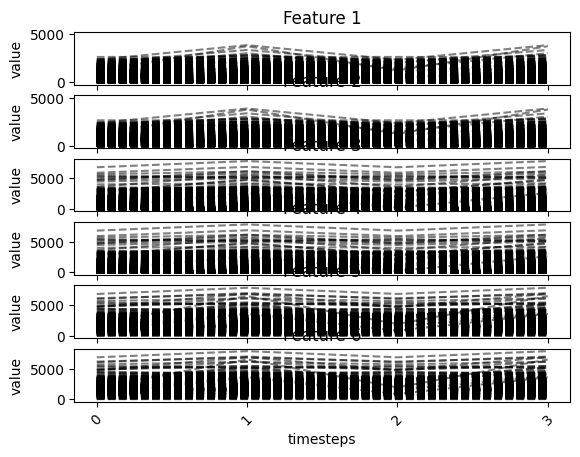

In [63]:
from tscluster.tsplot import tsplot

arr, label_dict = pc2.clustering_prep(network_table, 'name', ['occupied_private_dwellings_2016', 'single_detached_house_2016', 'apt_five_or_more_2016', 'occupied_private_dwellings_2021', 'single_detached_house_2021', 'apt_five_or_more_2021'])

fig, ax = tsplot.plot(X=arr)

In [ ]:
# Initialize the model
opt_ts = OptTSCluster(
    n_clusters=3,
    scheme='z1c1',
    n_allow_assignment_change=None # Allow as many changes as possible
)

arr = np.nan_to_num(arr, nan = -1000000)

# Assign clusters
opt_ts.fit(arr, label_dict=label_dict)